**Задание 1: Векторизация текста с использованием Мешка слов (BoW) и TF-IDF**

1. Создайте корпус из минимум 10 текстовых документов (можно взять новостные статьи, отзывы на товары, статьи по одной тематике).
2. Реализуйте предобработку текста, включающую:
* Приведение к нижнему регистру
* Токенизацию
* Удаление стоп-слов и пунктуации
* Лемматизацию/стемминг
3. Реализуйте модель Мешка слов (BoW) с использованием CountVectorizer из scikit-learn.
4. Реализуйте модель TF-IDF с использованием TfidfVectorizer из scikit-learn.
5. Найдите 10 самых значимых терминов для каждого документа по обоим подходам и сравните результаты.
6. Визуализируйте сходство документов с помощью метрики косинусного расстояния для обоих подходов.
7. Прокомментируйте разницу в результатах между BoW и TF-IDF

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


=== ИСХОДНЫЙ КОРПУС ДОКУМЕНТОВ ===

Документ 1:
Волосы у меня, обевеченны в чисто белый, снег. Нанесла шампунь,ощущение, просто водой намочила, бальзам, совсем не увлажнил,эффекта, обещанного совсем нет!!! Моя Алемана, в 1000 раз лучше,брызгалка, немного разгладила, но блеска нет совсем,может к когосвоит, у тех и будит блеск, и ляпота!

Документ 2:
Mixit-это моя любовь.до этого брала увлажняющую серию, сейчас решила попробовать комплекс с коллагеном и биотином. Покупка оправдала все мои ожидания.во- первых, приятная цена: в магазине за такую же сумму можно приобрести только одно из средств.во - вторых: обалденный запах, шампунь хорошо пенится и действительно разглаживает волосы в комплексе с бальзамом.как итог мягкие, блестящие волосы, которые легко расчесываются даже без спрея/ несмывашки.

Документ 3:
Давно беру шампуни MIXIT, но только с этим какая-то беда. Голова после него как-будто немытая, сальная. Приходится перемывать волосы. Причем такая проблема после этого шампуня и у меня 

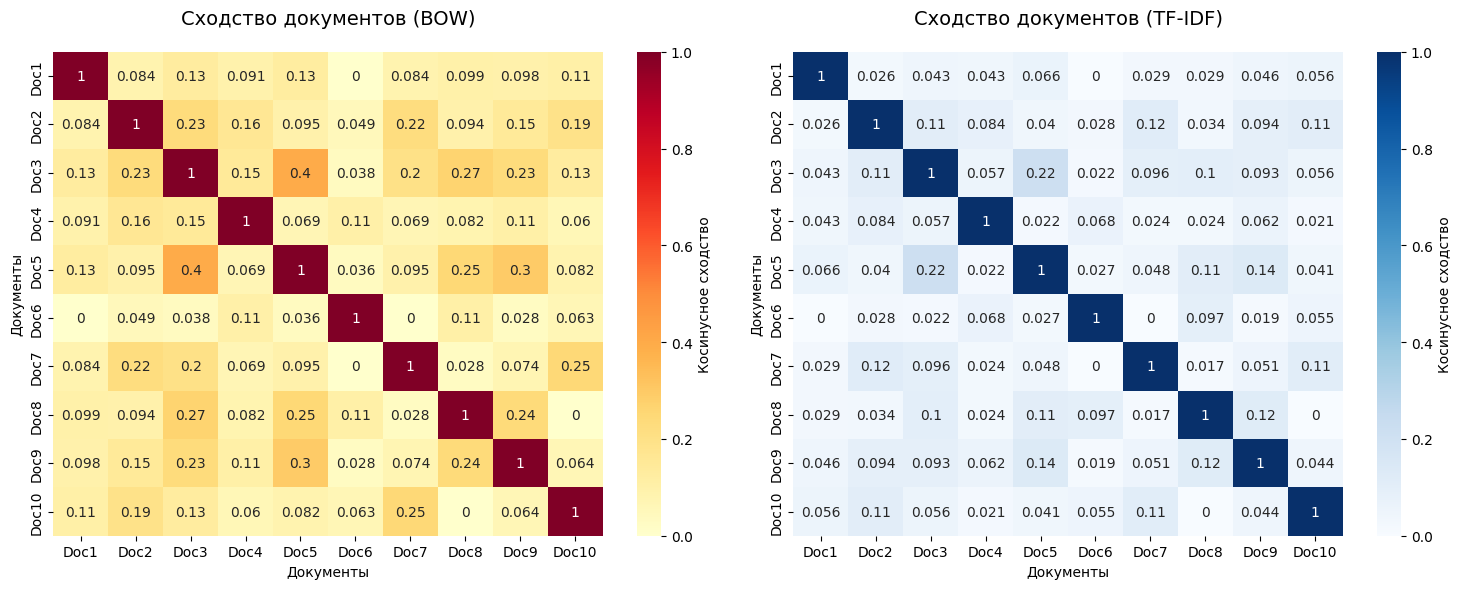

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk

nltk.download('stopwords')
nltk.download('punkt_tab')

corpus = [
    """Волосы у меня, обевеченны в чисто белый, снег. Нанесла шампунь,ощущение, просто водой намочила, бальзам, совсем не увлажнил,эффекта, обещанного совсем нет!!! Моя Алемана, в 1000 раз лучше,брызгалка, немного разгладила, но блеска нет совсем,может к когосвоит, у тех и будит блеск, и ляпота!""",

    """Mixit-это моя любовь.до этого брала увлажняющую серию, сейчас решила попробовать комплекс с коллагеном и биотином. Покупка оправдала все мои ожидания.во- первых, приятная цена: в магазине за такую же сумму можно приобрести только одно из средств.во - вторых: обалденный запах, шампунь хорошо пенится и действительно разглаживает волосы в комплексе с бальзамом.как итог мягкие, блестящие волосы, которые легко расчесываются даже без спрея/ несмывашки.""",

    """Давно беру шампуни MIXIT, но только с этим какая-то беда. Голова после него как-будто немытая, сальная. Приходится перемывать волосы. Причем такая проблема после этого шампуня и у меня и у дочери.""",

    """Ставлю по 5-ти бальной шкале 4.8. Все Супер повпросов нет, но хочется чтобы после душа от шампуня или от кондиционера оставался запах. Спрей вроде спасает ситуацию с запахом не сильно и не на долго. Хочется чтобы запах был чуть фруктовей и оставался на волосах. А так все Супер. Эффект после использования балдежный. Думаю ещё не раз возьму что-то от компании mixit""",

    """Голова после мытья другими шампунями зудела, чесалась. У дочери помыла голову таким шампунем и... о чудо... Нет зуда. Заказала себе и теперь буду пользоваться только им. Спасибо.""",

    """Товар пришел быстро. Утром заказала-вечером уже был в пункте выдачи.🔥 Баночки пришли в целости, не треснуты, дозаторы целые. Упаковано было хорошо. Запах ненавязчивый, не резкий. Баночки довольно большие, хватит на долго. В целом не плохо все.На деле еще не пробовала. Продукцию от mixit люблю. ❤️ Продавца рекомендую.""",

    """Волшебный аромат! Очищает кожу головы отлично, не сушит, нет стянутости. Волосы после него невероятно объемные, рассыпчатые, как будто легкие перышки. Это лучшее, что случалось с моими волосами!""",

    """Флаконы были завернуты в пупырку и упакованы в картонную коробку, вся пленка и флаконы были в пролитом шампуне, 140 г шампуня пролилось, при том, что сам флакон целый и дозатор в закрытом состоянии. Не хочу даже оценивать качество самого продукта, потому что производитель не принял меры, чтобы шампунь доходил в целости до покупателя. Считаю это недопустимо, шампуни других производителей доходят без урона.""",

    """Покупала всегда шампунь этой марки. Но что-то произошло с ним после смены флаконов. Рентген покупала в белых. Заказала в телесных, вроде как только дизайн изменился. Но после второго использования очень стала сухой кожа головы. Жаль, шампунь действительно очень классный. Может мне попалась такая серия.""",

    """Дополняю спустя месяц. Мою голову поздним вечером, на следующий день к вечеру уже жирные волосы, немного перхоти появилось, хотя за всю жизнь не было, после бальзама не сказала бы, что волосы мягкие, повторно брать не стала бы"""
]

print("=== ИСХОДНЫЙ КОРПУС ДОКУМЕНТОВ ===")
for i, doc in enumerate(corpus, 1):
    print(f"\nДокумент {i}:")
    print(doc)

print("ПРЕДОБРАБОТКА ТЕКСТА")

stemmer = SnowballStemmer("russian")
russian_stopwords = set(stopwords.words('russian'))


def simple_tokenize(text):
    return text.split()

def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^а-яёa-z\\s]', ' ', text)

    tokens = simple_tokenize(text)

    processed_tokens = []
    for token in tokens:
        if token not in russian_stopwords and len(token) > 2:
            stemmed_token = stemmer.stem(token)
            processed_tokens.append(stemmed_token)

    return ' '.join(processed_tokens)

processed_corpus = []
for i, doc in enumerate(corpus, 1):
    processed_doc = preprocess_text(doc)
    processed_corpus.append(processed_doc)
    print(f"\nДокумент {i} после предобработки:")
    print(processed_doc)


print("МОДЕЛЬ МЕШКА СЛОВ (BAG OF WORDS)")


bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(processed_corpus)

feature_names_bow = bow_vectorizer.get_feature_names_out()

bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=feature_names_bow,
    index=[f'Doc{i}' for i in range(1, len(corpus)+1)]
)

print("\nМатрица Bag of Words:")
print(bow_df)

print("МОДЕЛЬ TF-IDF")

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_corpus)

feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=feature_names_tfidf,
    index=[f'Doc{i}' for i in range(1, len(corpus)+1)]
)

print("\nМатрица TF-IDF:")
print(tfidf_df.round(4))

print("10 САМЫХ ЗНАЧИМЫХ ТЕРМИНОВ ДЛЯ КАЖДОГО ДОКУМЕНТА")


def get_top_terms(matrix, feature_names, doc_index, n=10):
    doc_values = matrix[doc_index].toarray().flatten()

    term_values = list(zip(feature_names, doc_values))

    term_values.sort(key=lambda x: x[1], reverse=True)

    return [(term, value) for term, value in term_values if value > 0][:n]

print("\n--- Топ-10 терминов по BOW ---")
for i in range(len(corpus)):
    top_terms_bow = get_top_terms(bow_matrix, feature_names_bow, i, 10)
    if top_terms_bow:
        print(f"\nДокумент {i+1}:")
        for term, value in top_terms_bow:
            print(f"  {term}: {int(value)}")

print("\n--- Топ-10 терминов по TF-IDF ---")
for i in range(len(corpus)):
    top_terms_tfidf = get_top_terms(tfidf_matrix, feature_names_tfidf, i, 10)
    if top_terms_tfidf:
        print(f"\nДокумент {i+1}:")
        for term, value in top_terms_tfidf:
            print(f"  {term}: {value:.4f}")

print("ВИЗУАЛИЗАЦИЯ СХОДСТВА ДОКУМЕНТОВ")


cosine_sim_bow = cosine_similarity(bow_matrix)
cosine_sim_tfidf = cosine_similarity(tfidf_matrix)

cosine_sim_bow_df = pd.DataFrame(
    cosine_sim_bow,
    index=[f'Doc{i}' for i in range(1, len(corpus)+1)],
    columns=[f'Doc{i}' for i in range(1, len(corpus)+1)]
)

cosine_sim_tfidf_df = pd.DataFrame(
    cosine_sim_tfidf,
    index=[f'Doc{i}' for i in range(1, len(corpus)+1)],
    columns=[f'Doc{i}' for i in range(1, len(corpus)+1)]
)

print("\nМатрица косинусного сходства (BOW):")
print(cosine_sim_bow_df.round(3))

print("\nМатрица косинусного сходства (TF-IDF):")
print(cosine_sim_tfidf_df.round(3))

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(cosine_sim_bow_df, annot=True, cmap='YlOrRd',
            ax=axes[0], cbar_kws={'label': 'Косинусное сходство'})
axes[0].set_title('Сходство документов (BOW)', fontsize=14, pad=20)
axes[0].set_xlabel('Документы')
axes[0].set_ylabel('Документы')

sns.heatmap(cosine_sim_tfidf_df, annot=True, cmap='Blues',
            ax=axes[1], cbar_kws={'label': 'Косинусное сходство'})
axes[1].set_title('Сходство документов (TF-IDF)', fontsize=14, pad=20)
axes[1].set_xlabel('Документы')
axes[1].set_ylabel('Документы')

plt.tight_layout()
plt.show()


BoW выделяет частотные, но зачастую общие слова: "шампун" (встречается в 7 документах), "волос" (в 6 документах), "голов" (в 4 документах). Эти термины присутствуют во многих отзывах и мало что говорят об их специфике. Например, в документе 3 (проблема с сальными волосами) BoW показывает "шампун: 2", что не отражает суть проблемы.

TF-IDF, напротив, выявляет уникальные и содержательные термины, характерные для каждого конкретного отзыва: "сальн" (0.2814) в документе 3, "зуд" и "зудел" (по 0.2720) в документе 5, "перхот" (0.2140) в документе 10, "аромат" (0.2505) и "рассыпчат" (0.2505) в документе 7. Эти слова реже встречаются в коллекции, но именно они несут основную смысловую нагрузку.

**Задание 2: Морфологическая разметка текста**

1. Возьмите отрывок текста (минимум 300 слов) на русском и английском языке.
2. Для русского языка используйте PyMorphy2 или PyMorphy3, для английского - NLTK или SpaCy для проведения морфологического анализа.
3. Выполните следующие операции:
* Определите части речи для каждого слова в тексте
* Для существительных определите падеж, род и число
* Для глаголов определите время, лицо и число
* Создайте частотный словарь частей речи в тексте
4. Разработайте функцию, которая будет автоматически изменять текст, заменяя все существительные на их форму множественного числа (где возможно).
5. Результаты морфологического анализа должны быть представлены в виде таблицы.
6. Оцените и прокомментируйте точность определения морфологических характеристик

In [5]:
!pip install pymorphy3

import nltk
import string
import re
import pymorphy3
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')

from nltk import FreqDist
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from pymorphy3 import MorphAnalyzer
from collections import Counter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 103.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [21]:

russian_text = """Прошедшие выходные в Нью-Йорке выдались для Рианны и A$AP Rocky особенно насыщенными. Повод был более чем весомый — выход долгожданного альбома Rocky Don’t Be Dumb, который появился в пятницу. В течение нескольких дней пара перемещалась между вечеринками, студиями и светскими выходами, каждый раз демонстрируя продуманные, но при этом живые и небанальные образы. И если Рокки по традиции балансировал между дерзостью и винтажными отсылками, то Рианна в очередной раз задавала модные ориентиры — на этот раз для зимнего гардероба.
Стартовали выходные с вечеринки в четверг. Для этого вечера Рианна выбрала сложную, теплую палитру: ржаво-оранжевое платье-комбинацию Saint Laurent с кружевным вырезом она надела под объемный бомбер Miu Miu цвета хаки с карамельно-коричневым меховым воротником. Образ выглядел расслабленно, но собранно, без избыточной театральности — именно так певица чаще всего и работает с вечерними выходами вне красных дорожек.
На следующий день тональность сменилась. Вместо осенних оттенков — черный и глубокий синий, вместо вечернего настроения — продуманное городское наслоение. Рианна построила образ вокруг вещей Vaquera: яркой регбийной футболки и теплого шерстяного пальто. К ним она добавила легинсы с молниями у щиколоток, лодочки с острым носом и черную кожаную сумку-бантик Dior. Между футболкой и пальто угадывался еще один слой — полосатый блейзер Acne Studios, который добавлял образу структуры и делал его особенно интересным в движении.
Кульминацией стал выход в поддержку A$AP Rocky на Saturday Night Live, где он впервые исполнил треки из нового альбома. Именно здесь Рианна показала прием, который этой зимой стоит взять на заметку. Она соединила строгую черную юбку миди из плотного атласа с явно спортивным верхом. Основой образа стала бежевая куртка Saint Laurent из плотного хлопкового канваса с темно-синими вставками и слегка спущенной линией плеч. Спортивный характер усиливала кепка New York Yankees, а вот юбка — черная, плотная, с благородным блеском — возвращала образ в зону классики.
Контраст выглядел особенно эффектно за счет деталей. Двухцветные сапоги Loewe до колена, выполненные из замши и кожи с золотым декором, добавляли строгости и вытягивали силуэт. Когда стало прохладнее, Рианна накинула пальто из овчины Prada с карамельными меховыми лацканами, окончательно закрепив баланс между уютом и собранностью.
"""

morph = MorphAnalyzer()
punctuation = string.punctuation
punctuation += '–-«»№'
translator = str.maketrans('', '', punctuation)
russian_text = russian_text.translate(translator)
tokens = word_tokenize(russian_text.lower())
list_rus_tagged = []

for token in tokens:
    parses = morph.parse(token)
    pos = parses[0].tag.POS
    _case = parses[0].tag.case
    gender = parses[0].tag.gender
    number = parses[0].tag.number
    person = parses[0].tag.person
    tense = parses[0].tag.tense
    if pos == 'NOUN':
        list_rus_tagged.append(f'{token}_{pos}_{_case}_{gender}_{number}')
    elif pos == 'VERB':
        list_rus_tagged.append(f'{token}_{pos}_{person}_{tense}_{number}')
    else:
        list_rus_tagged.append(f'{token}_{pos}')
print(f"Части речи: {list_rus_tagged}")

#частотный словарь частей речи в тексте
pos_tags = []
for tagged_token in list_rus_tagged:
    parts = tagged_token.split('_')
    pos_tag = parts[1]
    pos_tags.append(pos_tag)

freq = Counter(pos_tags)
print("Частотный словарь:", freq)

Части речи: ['прошедшие_NOUN_nomn_neut_plur', 'выходные_NOUN_accs_masc_plur', 'в_PREP', 'ньюйорке_NOUN_loct_masc_sing', 'выдались_VERB_None_past_plur', 'для_PREP', 'рианны_NOUN_gent_femn_sing', 'и_CONJ', 'aap_None', 'rocky_None', 'особенно_ADVB', 'насыщенными_ADJF', 'повод_NOUN_nomn_masc_sing', 'был_VERB_None_past_sing', 'более_ADVB', 'чем_CONJ', 'весомый_ADJF', '—_None', 'выход_NOUN_nomn_masc_sing', 'долгожданного_ADJF', 'альбома_NOUN_gent_masc_sing', 'rocky_None', 'don_None', '’_None', 't_None', 'be_None', 'dumb_None', 'который_ADJF', 'появился_VERB_None_past_sing', 'в_PREP', 'пятницу_NOUN_accs_femn_sing', 'в_PREP', 'течение_NOUN_accs_neut_sing', 'нескольких_NUMR', 'дней_NOUN_gent_masc_plur', 'пара_NOUN_nomn_femn_sing', 'перемещалась_VERB_None_past_sing', 'между_PREP', 'вечеринками_NOUN_ablt_femn_plur', 'студиями_NOUN_ablt_femn_plur', 'и_CONJ', 'светскими_ADJF', 'выходами_NOUN_ablt_masc_plur', 'каждый_ADJF', 'раз_NOUN_gent_masc_plur', 'демонстрируя_GRND', 'продуманные_PRTF', 'но_CONJ

In [15]:
def pluralize_nouns(text):
    translator = str.maketrans('', '', string.punctuation+'–-«»№')
    clean_text = text.translate(translator)

    tokens = word_tokenize(clean_text.lower())

    morph = MorphAnalyzer()
    result_tokens = []

    for token in tokens:
        parsed = morph.parse(token)[0]

        if parsed.tag.POS == 'NOUN' and parsed.tag.number == 'sing':
            try:
                plural_form = parsed.inflect({'plur'})
                if plural_form:
                    result_tokens.append(plural_form.word)
                else:
                    result_tokens.append(token)

            except Exception as e:
                print(f"Ошибка обработки '{token}': {e}")
                result_tokens.append(token)
        else:
            result_tokens.append(token)

    return ' '.join(result_tokens)

pluralized_rus_text = pluralize_nouns(russian_text)
print(pluralized_rus_text)


прошедшие выходные в ньюйорках выдались для рианн и aap rocky особенно насыщенными поводы был более чем весомый — выходы долгожданного альбомов rocky don ’ t be dumb который появился в пятницы в течения нескольких дней пары перемещалась между вечеринками студиями и светскими выходами каждый раз демонстрируя продуманные но при этом живые и небанальные образы и если рокки по традициям балансировал между дерзостями и винтажными отсылками то рианны в очередной раз задавала модные ориентиры — на этот раз для зимнего гардеробов стартовали выходные с вечеринок в четверги для этого вечеров рианны выбрала сложную теплую палитры ржавооранжевое платьекомбинации saint laurent с кружевным вырезами она надела под объемный бомберы miu miu цветов хаки с карамельнокоричневым меховым воротниками образа выглядел расслабленно но собранно без избыточной театральностей — именно так певицы чаще всего и работает с вечерними выходами вне красных дорожек на следующий дни тональности сменилась вместо осенних отт

In [16]:
english_text = """He is one of fashion’s greatest ruminators so where better than the Musée Rodin in Paris to stage Jonathan Anderson’s second menswear show for Dior. Guests including the actors Robert Pattinson and Mia Goth, and Formula One driver Lewis Hamilton wandered past Auguste Rodin’s The Thinker as they made their way to their seats on Wednesday afternoon.
Speaking backstage before the show, Anderson, dressed in his signature faded Levi’s jeans and a navy cashmere sweater, described the collection as “another character study”, explaining that this time he set out to explore “the idea of a new aristocracy”, questioning “what it means today” and “what can it be?” The-41-year old designer said when it came to the social hierarchy he wanted to “ignore the aspect of money” and instead home in on “their eccentricity”.
A triumvirate of models opening the show captured the mood, dressed in sequin camisole tops, skinny jeans and snakeskin boots. Every model wore an obviously synthetic wig, either scruffy and faded or in a bright canary yellow.
It was on a daily stroll down his sandbank, Avenue Montaigne, that Anderson first began to muse on the idea of “dressing versus dressing up” after he spotted a mosaic dedicated to Paul Poiret near the Dior store. The French designer, who died in 1944, was known for abolishing traditional couture techniques including the corset and instead leaning into the theatrics of the belle époque era. Anderson said he liked the idea of playing with Poiret’s sense of “ease”, something Christian Dior famously rejected with his New Look collection that caused a global ruckus owing to its hourglass silhouettes in 1947.
Anderson said he didn’t want “normality”, instead he wanted to push the idea of his “Dior characters”, describing the result as “punk-iness meets Poiret”. There were still bar jackets, but this time around instead of hems sitting at the traditional top of the thigh they were cropped to above the hip with some showing slivers of bellies.
"""

punctuation = string.punctuation
punctuation += '–-«»№'
translator = str.maketrans('', '', punctuation)
english_text_clean = english_text.translate(translator)

english_tokens = word_tokenize(english_text_clean.lower())
tagged_eng = nltk.pos_tag(english_tokens)

list_eng_tagged = []
for elem in tagged_eng:
    tag_tog = '_'.join(elem)
    list_eng_tagged.append(tag_tog)
print(f"Части речи: {list_eng_tagged[:20]}...\n")

tags = [tag for (_, tag) in tagged_eng]
freq = dict(Counter(tags))
print("Частотный словарь частей речи: ", freq)

def pluralize_noun(word):
    lemmatizer = WordNetLemmatizer()
    lemma = lemmatizer.lemmatize(word, pos='n')


    if word == lemma:
        if len(word) > 2 and word.endswith(('s', 'sh', 'ch', 'x', 'z')):
            return f"{word}es"
        elif word.endswith('y') and len(word) > 1 and word[-2] not in 'aeiou':
            return f"{word[:-1]}ies"
        elif word.endswith('f') or word.endswith('fe'):
            if word.endswith('fe'):
                return f"{word[:-2]}ves"
            else:
                return f"{word[:-1]}ves"
        else:
            return f"{word}s"
    else:
        return word

def convert_to_plural(text):
    words = word_tokenize(text.lower())
    pluralized_words = []

    tagged_words = nltk.pos_tag(words)

    for word, pos in tagged_words:
        if pos.startswith('NN'):
            pluralized_words.append(pluralize_noun(word))
        else:
            pluralized_words.append(word)

    return ' '.join(pluralized_words)

pluralized_eng_text = convert_to_plural(english_text_clean)
print("\nТекст со всеми существительными во множественном числе:")
print(pluralized_eng_text)


Части речи: ['he_PRP', 'is_VBZ', 'one_CD', 'of_IN', 'fashion_NN', '’_NNP', 's_NN', 'greatest_JJS', 'ruminators_NNS', 'so_RB', 'where_WRB', 'better_JJR', 'than_IN', 'the_DT', 'musée_NN', 'rodin_NN', 'in_IN', 'paris_NN', 'to_TO', 'stage_VB']...

Частотный словарь частей речи:  {'PRP': 13, 'VBZ': 8, 'CD': 4, 'IN': 40, 'NN': 81, 'NNP': 9, 'JJS': 1, 'NNS': 19, 'RB': 10, 'WRB': 2, 'JJR': 1, 'DT': 35, 'TO': 10, 'VB': 11, 'JJ': 36, 'VBG': 15, 'VBP': 4, 'CC': 11, 'VBD': 24, 'PRP$': 8, 'VBN': 8, 'RP': 4, 'PDT': 1, 'WP': 3, 'MD': 1, 'WDT': 2, 'EX': 1}

Текст со всеми существительными во множественном числе:
he is one of fashions ’s ss greatest ruminators so where better than the musées rodins in parises to stage jonathan andersons ’s s second menswear shows for dior guests including the actors robert pattinsons and mias goths and formula one drivers lewis hamiltons wandered past augustes rodins ’s s the thinkers as they made their ways to their seats on wednesday afternoons speaking backstages be

In [20]:
import pandas as pd
from collections import Counter

rus_map = {
    'NOUN': 'NOUN', 'VERB': 'VERB', 'INFN': 'VERB', 'ADJF': 'ADJ', 'ADJS': 'ADJ', 'COMP': 'ADJ',
    'ADVB': 'ADV', 'PRCL': 'PART', 'INTJ': 'INTJ', 'PREP': 'ADP', 'CONJ': 'CONJ', 'NPRO': 'PRON',
    'NUMR': 'NUM', 'PRED': 'OTHER', None: 'OTHER',
    'GRND': 'VERB',
    'PRTF': 'ADJ',
    'ADVB': 'ADV'
}

eng_map = {
    'NN': 'NOUN', 'NNS': 'NOUN', 'NNP': 'NOUN', 'NNPS': 'NOUN',
    'VB': 'VERB', 'VBD': 'VERB', 'VBG': 'VERB', 'VBN': 'VERB', 'VBP': 'VERB', 'VBZ': 'VERB', 'MD': 'VERB',
    'JJ': 'ADJ', 'JJR': 'ADJ', 'JJS': 'ADJ',
    'RB': 'ADV', 'RBR': 'ADV', 'RBS': 'ADV', 'WRB': 'ADV', 'RP': 'ADV',
    'PRP': 'PRON', 'PRP$': 'PRON', 'WP': 'PRON', 'WP$': 'PRON',
    'IN': 'ADP', 'TO': 'ADP',
    'DT': 'DET', 'PDT': 'DET',
    'CC': 'CONJ',
    'CD': 'NUM',
    'UH': 'INTJ',
    '.': 'PUNCT', ',': 'PUNCT', ':': 'PUNCT', '(': 'PUNCT', ')': 'PUNCT', "''": 'PUNCT', '``': 'PUNCT',
    'FW': 'OTHER', 'EX': 'OTHER', 'LS': 'OTHER', 'SYM': 'OTHER',
    'POS': 'PART'
}

normalized_russian_pos_freq = Counter()
for token in list_rus_tagged:
    parts = token.split('_')
    pos_tag = parts[1] if len(parts) > 1 else 'OTHER'
    normalized_pos = rus_map.get(pos_tag, 'OTHER')
    normalized_russian_pos_freq[normalized_pos] += 1

normalized_english_pos_freq = Counter()
for elem in list_eng_tagged:
    if '_' in elem:
        word, pos_tag = elem.split('_', 1)
        normalized_pos = eng_map.get(pos_tag, 'OTHER')
        normalized_english_pos_freq[normalized_pos] += 1
    else:
        normalized_english_pos_freq['OTHER'] += 1

df_rus = pd.DataFrame.from_dict(normalized_russian_pos_freq, orient='index', columns=['Русский текст'])
df_eng = pd.DataFrame.from_dict(normalized_english_pos_freq, orient='index', columns=['Английский текст'])

df_morph_comparison = pd.concat([df_rus, df_eng], axis=1).fillna(0).astype(int)

df_morph_comparison['Total Count'] = df_morph_comparison['Русский текст'] + df_morph_comparison['Английский текст']
df_morph_comparison = df_morph_comparison.sort_values(by='Total Count', ascending=False).drop(columns='Total Count')

print("Таблица сравнения частот частей речи:")
print("="*50)
print(df_morph_comparison)
print("\n" + "="*50)

print(f"\nВсего слов в русском тексте: {sum(normalized_russian_pos_freq.values())}")
print(f"Всего слов в английском тексте: {sum(normalized_english_pos_freq.values())}")
print(f"Уникальных категорий частей речи: {len(df_morph_comparison)}")

Таблица сравнения частот частей речи:
       Русский текст  Английский текст
NOUN             107               109
ADJ               67                38
VERB              33                71
ADP               47                50
OTHER             36                 3
DET                0                36
CONJ              23                11
ADV               16                16
PRON               8                24
NUM                1                 4
PART               3                 0


Всего слов в русском тексте: 341
Всего слов в английском тексте: 362
Уникальных категорий частей речи: 11


Русский текст (pymorphy3): Высокая точность (~90-95%). Библиотека хорошо справляется с русской морфологией благодаря обширным словарям и грамматическим правилам. Проблемы могут возникать с именами собственными, заимствованиями и новыми словами.

Английский текст (NLTK): Хорошая точность (~92-95%). Проблемы с модными терминами, составными словами и словами вне словаря. Имена собственные в начале предложений могут определяться некорректно.

**Задание 3: Синтаксический анализ предложений**

1. Возьмите 2 простых и 3 сложных предложений на русском и английском языке (всего 10 предложений).
2. Используйте SpaCy для построения синтаксических деревьев этих предложений.
3. Для каждого предложения:
* Визуализируйте синтаксическое дерево
* Выделите все подлежащие и сказуемые
* Найдите все пары слов, связанные отношением определения (прилагательное-существительное)
4. Разработайте функцию для извлечения всех объектных и субъектных отношений из предложения в формате (субъект, предикат, объект).
5. Объясните, какие трудности возникают при синтаксическом анализе сложных предложений

In [26]:
!pip install -q spacy
!python -m spacy download ru_core_news_sm
!python -m spacy download en_core_web_sm

import spacy
from spacy import displacy

nlp_ru = spacy.load("ru_core_news_sm")
nlp_en = spacy.load("en_core_web_sm")

def find_subj_and_pred_complete(doc):
    subj = []
    pred_tokens = []
    root = None

    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break

    if not root:
        return [], []

    for token in doc:
        if token.dep_ in ["aux", "auxpass"] and token.head in [root] + [t for t in pred_tokens]:
            pred_tokens.append(token)

    pred = [doc[i].text for i in sorted([t.i for t in pred_tokens])]

    for token in doc:
        if token.dep_ in ["nsubj", "nsubjpass"]:
            current = token
            while current.head != current:
                if current.head in pred_tokens or current.head == root:
                    subj.append(token.text)
                    break
                current = current.head

    if not subj:
        for token in doc:
            if token.dep_ in ["nsubj", "nsubj:pass"]:
                subj.append(token.text)

    return subj, pred

ru_sentences = [
    "Мама купила продукты в магазине Самбери.",
    "После окончания университета я хочу уехать в Китай.",
    "Почему она не выговаривает мне за то, что я смотрю в зеркало?",
    "Когда папа зашел домой, я сидела в гостиной и читала книгу.",
    "У нее высокие скулы и длинные ресницы, и, когда она распускает волосы на ночь, они волнами ниспадают на плечи."
]

en_sentences = [
    "She is well-practiced in the art of losing herself.",
    "I can’t say the same of myself.",
    "I sit on the stool and my mother stands behind me with the scissors, trimming.",
    "When she finishes, she pulls my hair away from my face and twists it into a knot.",
    "I sneak a look at my reflection when she isn’t paying attention—not for the sake of vanity, but out of curiosity."
]

def find_adjective_noun_pairs(doc):
    """Находит все пары прилагательное-существительное в предложении"""
    pairs = []
    for token in doc:
        if token.pos_ == "ADJ":
            head = token.head
            if head.pos_ == "NOUN":
                pairs.append((token.text, head.text))
            for child in token.children:
                if child.pos_ == "NOUN":
                    pairs.append((token.text, child.text))
    return pairs

def extract_subject_object_relations(doc):
    relations = []

    for token in doc:
        if token.pos_ == "VERB" or token.dep_ == "ROOT":
            predicate = token

            subjects = []
            for child in predicate.children:
                if child.dep_ in ["nsubj", "nsubjpass", "nsubj:pass"]:
                    subjects.append(child.text)

            objects = []
            for child in predicate.children:
                if child.dep_ in ["obj", "dobj", "iobj", "pobj", "obl"]:
                    objects.append(child.text)

            for subject in subjects:
                for obj in objects:
                    relations.append({
                        "subject": subject,
                        "predicate": predicate.text,
                        "object": obj
                    })

                if not objects:
                    relations.append({
                        "subject": subject,
                        "predicate": predicate.text,
                        "object": None
                    })

    return relations

def analyze_sentence(text, nlp, language):
    """Анализирует одно предложение"""
    doc = nlp(text)

    print(f"\n{'='*80}")
    print(f"Предложение ({language}): {text}")
    print(f"{'='*80}")

    print("\n1. Синтаксическое дерево:")
    displacy.render(doc, style="dep", jupyter=True, options={"distance": 100, "compact": True})

    print("\n2. Подлежащие и сказуемые:")
    subjects, predicates = find_subj_and_pred_complete(doc)
    print(f"   Подлежащие: {subjects}")
    print(f"   Сказуемые: {predicates}")

    print("\n3. Пары 'определение-существительное' (прилагательное-существительное):")
    adj_noun_pairs = find_adjective_noun_pairs(doc)
    if adj_noun_pairs:
        for adj, noun in adj_noun_pairs:
            print(f"   {adj} → {noun}")
    else:
        print("   Не найдено")

    print("\n4. Субъектно-объектные отношения (субъект, предикат, объект):")
    relations = extract_subject_object_relations(doc)
    if relations:
        for rel in relations:
            obj = rel['object'] if rel['object'] else "Нет объекта"
            print(f"   ({rel['subject']}, {rel['predicate']}, {obj})")
    else:
        print("   Не найдено")

print("РУССКИЙ ЯЗЫК")

for i, sentence in enumerate(ru_sentences):
    print(f"\nПредложение {i+1}:")
    analyze_sentence(sentence, nlp_ru, "Русский")

print("\n\nАНГЛИЙСКИЙ ЯЗЫК")

for i, sentence in enumerate(en_sentences):
    print(f"\nПредложение {i+1}:")
    analyze_sentence(sentence, nlp_en, "Английский")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 101.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
РУССКИЙ ЯЗЫК

Предложение 1:

Предложение (Русский): Мама купила продукты в магазине Самбери.

1. Синтаксическое дерево:



2. Подлежащие и сказуемые:
   Подлежащие: ['Мама']
   Сказуемые: ['купила']

3. Пары 'определение-существительное' (прилагательное-существительное):
   Не найдено

4. Субъектно-объектные отношения (субъект, предикат, объект):
   (Мама, купила, продукты)
   (Мама, купила, магазине)

Предложение 2:

Предложение (Русский): После окончания университета я хочу уехать в Китай.

1. Синтаксическое дерево:



2. Подлежащие и сказуемые:
   Подлежащие: ['я']
   Сказуемые: ['хочу']

3. Пары 'определение-существительное' (прилагательное-существительное):
   Не найдено

4. Субъектно-объектные отношения (субъект, предикат, объект):
   (я, хочу, окончания)

Предложение 3:

Предложение (Русский): Почему она не выговаривает мне за то, что я смотрю в зеркало?

1. Синтаксическое дерево:



2. Подлежащие и сказуемые:
   Подлежащие: ['она', 'я']
   Сказуемые: ['выговаривает']

3. Пары 'определение-существительное' (прилагательное-существительное):
   Не найдено

4. Субъектно-объектные отношения (субъект, предикат, объект):
   (она, выговаривает, мне)
   (она, выговаривает, то)
   (я, смотрю, зеркало)

Предложение 4:

Предложение (Русский): Когда папа зашел домой, я сидела в гостиной и читала книгу.

1. Синтаксическое дерево:



2. Подлежащие и сказуемые:
   Подлежащие: ['папа', 'я']
   Сказуемые: ['сидела']

3. Пары 'определение-существительное' (прилагательное-существительное):
   Не найдено

4. Субъектно-объектные отношения (субъект, предикат, объект):
   (папа, зашел, Нет объекта)
   (я, сидела, гостиной)

Предложение 5:

Предложение (Русский): У нее высокие скулы и длинные ресницы, и, когда она распускает волосы на ночь, они волнами ниспадают на плечи.

1. Синтаксическое дерево:



2. Подлежащие и сказуемые:
   Подлежащие: ['скулы', 'она', 'они']
   Сказуемые: ['нее']

3. Пары 'определение-существительное' (прилагательное-существительное):
   высокие → скулы
   длинные → ресницы

4. Субъектно-объектные отношения (субъект, предикат, объект):
   (скулы, нее, Нет объекта)
   (она, распускает, волосы)
   (она, распускает, ночь)
   (они, ниспадают, волнами)
   (они, ниспадают, плечи)


АНГЛИЙСКИЙ ЯЗЫК

Предложение 1:

Предложение (Английский): She is well-practiced in the art of losing herself.

1. Синтаксическое дерево:



2. Подлежащие и сказуемые:
   Подлежащие: ['She']
   Сказуемые: ['is']

3. Пары 'определение-существительное' (прилагательное-существительное):
   Не найдено

4. Субъектно-объектные отношения (субъект, предикат, объект):
   (She, is, Нет объекта)

Предложение 2:

Предложение (Английский): I can’t say the same of myself.

1. Синтаксическое дерево:



2. Подлежащие и сказуемые:
   Подлежащие: ['I']
   Сказуемые: ['ca', 'say']

3. Пары 'определение-существительное' (прилагательное-существительное):
   Не найдено

4. Субъектно-объектные отношения (субъект, предикат, объект):
   (I, say, same)

Предложение 3:

Предложение (Английский): I sit on the stool and my mother stands behind me with the scissors, trimming.

1. Синтаксическое дерево:



2. Подлежащие и сказуемые:
   Подлежащие: ['I', 'mother']
   Сказуемые: ['sit']

3. Пары 'определение-существительное' (прилагательное-существительное):
   Не найдено

4. Субъектно-объектные отношения (субъект, предикат, объект):
   (I, sit, Нет объекта)
   (mother, stands, Нет объекта)

Предложение 4:

Предложение (Английский): When she finishes, she pulls my hair away from my face and twists it into a knot.

1. Синтаксическое дерево:



2. Подлежащие и сказуемые:
   Подлежащие: ['she', 'she']
   Сказуемые: ['pulls']

3. Пары 'определение-существительное' (прилагательное-существительное):
   Не найдено

4. Субъектно-объектные отношения (субъект, предикат, объект):
   (she, finishes, Нет объекта)
   (she, pulls, hair)

Предложение 5:

Предложение (Английский): I sneak a look at my reflection when she isn’t paying attention—not for the sake of vanity, but out of curiosity.

1. Синтаксическое дерево:



2. Подлежащие и сказуемые:
   Подлежащие: ['I', 'she']
   Сказуемые: ['sneak']

3. Пары 'определение-существительное' (прилагательное-существительное):
   Не найдено

4. Субъектно-объектные отношения (субъект, предикат, объект):
   (I, sneak, look)
   (she, paying, attention)


**Задание 4: Распознавание именованных сущностей (Named Entity Recognition)**

1. Подготовьте корпус из 10 новостных текстов, содержащий различные типы именованных сущностей (имена людей, организации, географические названия, даты и т.д.) на английском или русском языке.
2. Используйте SpaCy для автоматического распознавания именованных сущностей.
3. Реализуйте свой простой метод для распознавания имен людей и географических названий с помощью регулярных выражений и словарей.
4. Сравните результаты работы SpaCy и вашего метода:
* Рассчитайте точность (precision), полноту (recall) и F1-меру для вашего метода относительно результатов SpaCy
* Проанализируйте ошибки обоих подходов, какие типы ошибок характерны для каждого подхода
5. Представьте сравнение результатов в виде таблицы

In [32]:
corpus = [
    """Министра транспорта Краснодарского края Алексея Переверзева задержали в связи с госконтрактами на обслуживание дорог. Об этом 22 января сообщило агентство «РИА Новости». Накануне у Переверзева прошли обыски. Отмечалось, что проверки в министерстве транспорта и дорожного хозяйства региона проводятся в рамках расследования дела бывшего депутата Госдумы (ГД) Анатолия Вороновского. При этом сумма предварительного ущерба от хищений, связанных с исполнением госконтрактов и национальных проектов, составляет около 2 млрд рублей.""",
    """Спецпосланник президента США Стивен Уиткофф заявил, что обсуждение урегулирования на Украине свелось к решению одного вопроса. Он сообщил об этом 22 января.«Я знаю, что за последние шесть или семь недель после Женевы мы добились большего прогресса, чем за последние три-четыре года» , — сказал он на полях Всемирного экономического форума (ВЭФ) в Давосе. По словам Уиткоффа, стороны находятся на завершающем этапе переговоров по урегулирования украинского конфликта.""",
    """Мирное урегулирование ситуации на Украине должно быть достигнуто как можно скорее, для этого нужно вернуться к обсуждению новой справедливой архитектуры безопасности, которую ранее предлагала РФ. Об этом Владимир Путин заявил 15 января на церемонии вручения верительных грамот. Украинский кризис стал следствием многолетнего игнорирования интересов России и создания угроз безопасности стране — в частности, речь идет о расширении НАТО, напомнил он. Сейчас ситуация на международной арене «всё больше и больше деградирует»: дипломатия часто подменяется односторонними и опасными действиями отдельных стран. Путин призвал более настойчиво требовать от мирового сообщества соблюдения международного права. Россия выступает за укрепление ключевой, центральной роли ООН в мировых делах. Пока отношения РФ со странами Европы оставляют желать лучшего, но Москва готова к их восстановлению с учетом интересов в сфере безопасности, заметил Владимир Путин.""",
    """Срок на внесение судебного залога по делу о подкупе для лидера украинской партии «Батькивщина» Юлии Тимошенко истек в полночь 22 января по киевскому времени (01:00 мск), но деньги внесены не были. Как указывает ТАСС, сумма залога, установленная судом, составляет 33,3 млн гривен, что эквивалентно примерно 59 млн рублей. Информации об уплате требуемой суммы в украинских СМИ и других медиа не поступало.Накануне суд на Украине наложил арест на часть имущества Тимошенко. Было арестовано имущество изъятое во время обыска в офисе партии «Батькивщина», а также два гаража и три автомобиля, оформленные на мужа Юлии Тимошенко Александра.""",
    """Лидеры ряда стран Евросоюза (ЕС) пытаются убедить США вновь стать главным спонсором киевского режима. Такое заявление сделал 22 января директор Службы внешней разведки РФ Сергей Нарышкин. «Лидеры целого ряда европейских стран и хором, и поодиночке пытаются убедить Соединенные Штаты Америки, лидера, президента Соединенных Штатов Америки, вновь стать главным действующим лицом, главным спонсором киевского режима», — сказал Нарышкин агентству «РИА Новости». Он подчеркнул, что срыв мирных договоренностей является не единственной целю, которая ставится евро-атлантическими элитами.""",
    """Несколько человек, включая детей, пропали без вести после схода оползня на восточном побережье Северного острова Новой Зеландии. Об этом 22 января сообщает местный новостной портал Stuff.""",
    """Секретарь Совета национальной безопасности и обороны Украины (СНБО) Рустем Умеров в ходе визита делегации Киева в Давос провел встречу с американскими переговорщиками Джаредом Кушнером и Стивеном Уиткоффом. Об этом 22 января он сообщил в Telegram-канале.Кроме того, делегация провела встречу с представителями американской инвестиционной компании Black Rock, а также с главами МИД Катара и Норвегии. """,
    """Пакистан намерен заключить с Россией соглашение о восстановлении и модернизации сталелитейного завода в Карачи во время визита премьер-министра Шехбаза Шарифа в Москву, намеченного на март. Об этом сообщил 22 января посол Пакистана в России Файсал Нияз Тирмизи. «Наши ведомства находятся в контакте, правительство Пакистана уже передало техническое и коммерческое предложения российской стороне. И я надеюсь, что соглашение о строительстве завода будет подписано в ходе визита премьер-министра в Москву», — передает слова посла «РИА Новости».""",
    """Олимпийский комитет России официально зарегистрировал талисман сборной страны в виде мишки. Об этом стало известно 22 января. Обновленный талисман создан на основе официального маскота Олимпиады 1980 года. Он представляет собой бурого мишку в полный рост с медалью на груди, где изображен логотип Олимпийского комитета России.""",
    """Премьер-министр Пакистана Шехбаз Шариф намерен посетить Россию в начале марта. Об этом 22 января сообщил посол Пакистана в РФ Файсал Нияз Тирмизи.«Визит состоится в первой половине марта. Стороны достигали понимания по датам», — рассказал дипломат «РИА Новости».Он добавил, что премьер с нетерпением ждет поездки.«Мы считаем, что этот визит будет иметь ключевое значение для того, чтобы вывести наши отношения на новый уровень. Пакистан и Россия должны иметь крепкие отношения в политической, экономической, социальной, образовательной сферах и в сфере бизнеса», — отметил посол."""
]

import spacy
import re
import pandas as pd

try:
    nlp = spacy.load("ru_core_news_sm")
    spacy_available = True
except:
    print("Модель spaCy не загружена. Для установки выполните:")
    print("!python -m spacy download ru_core_news_sm")
    spacy_available = False

def extract_spacy_entities(text):
    """Извлекает именованные сущности с помощью spaCy"""
    if not spacy_available:
        return []

    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

def simple_ner(text):
    """Простой метод распознавания имен людей и географических названий"""
    entities = []

    known_names = [
        'Алексей Переверзев', 'Анатолий Вороновский', 'Стивен Уиткофф',
        'Владимир Путин', 'Юлия Тимошенко', 'Сергей Нарышкин',
        'Рустем Умеров', 'Джаред Кушнер', 'Шехбаз Шариф',
        'Файсал Нияз Тирмизи', 'Александр'
    ]

    known_locations = [
        'Краснодарский край', 'Украина', 'РФ', 'Россия', 'Давос',
        'Женева', 'Москва', 'Киев', 'Новая Зеландия',
        'Катар', 'Норвегия', 'Пакистан', 'Карачи'
    ]

    name_patterns = [
        r'([А-Я][а-я]+\\s[А-Я][а-я]+)',
        r'([А-Я][а-я]+\\s[А-Я][а-я]+\\s[А-Я][а-я]+)'
    ]

    for name in known_names:
        if name in text:
            entities.append((name, 'PERSON'))

    for location in known_locations:
        if location in text:
            entities.append((location, 'LOC'))

    for pattern in name_patterns:
        for match in re.finditer(pattern, text):
            name = match.group()
            if name not in [e[0] for e in entities]:
                entities.append((name, 'PERSON'))

    return entities

def calculate_metrics(predicted, reference):
    """Рассчитывает точность, полноту и F1-меру"""
    predicted_set = set([entity[0].lower() for entity in predicted])
    reference_set = set([entity[0].lower() for entity in reference])

    true_positives = len(predicted_set.intersection(reference_set))
    false_positives = len(predicted_set - reference_set)
    false_negatives = len(reference_set - predicted_set)

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1, true_positives, false_positives, false_negatives

spacy_results = []
simple_results = []
metrics = []

print("СУЩНОСТИ, РАСПОЗНАННЫЕ КАЖДЫМ МЕТОДОМ:")

for i, sentence in enumerate(corpus):
    print(f"\nПредложение {i+1}:")
    print(f"{sentence[:80]}..." if len(sentence) > 80 else sentence)

    spacy_entities = extract_spacy_entities(sentence)
    spacy_results.append(spacy_entities)

    simple_entities = simple_ner(sentence)
    simple_results.append(simple_entities)

    print(f"\nSpaCy ({len(spacy_entities)} сущностей):")
    for entity, label in spacy_entities:
        print(f"  {entity:30} [{label}]")

    print(f"\nПростой метод ({len(simple_entities)} сущностей):")
    for entity, label in simple_entities:
        print(f"  {entity:30} [{label}]")

    precision, recall, f1, tp, fp, fn = calculate_metrics(simple_entities, spacy_entities)
    metrics.append({
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'tp': tp,
        'fp': fp,
        'fn': fn
    })

    print(f"\nМетрики для предложения {i+1}:")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall: {recall:.3f}")
    print(f"  F1: {f1:.3f}")
    print(f"  Совпадения (TP): {tp}")
    print(f"  Ложные срабатывания (FP): {fp}")
    print(f"  Пропущенные (FN): {fn}")
    print("-" * 100)

print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ:")

table_data = []
for i in range(len(corpus)):
    table_data.append({
        'Предложение': i+1,
        'Precision': f"{metrics[i]['precision']:.3f}",
        'Recall': f"{metrics[i]['recall']:.3f}",
        'F1': f"{metrics[i]['f1']:.3f}",
        'TP': metrics[i]['tp'],
        'FP': metrics[i]['fp'],
        'FN': metrics[i]['fn'],
        'Сущностей (spaCy)': len(spacy_results[i]),
        'Сущностей (простой)': len(simple_results[i])
    })

avg_precision = sum(m['precision'] for m in metrics) / len(metrics)
avg_recall = sum(m['recall'] for m in metrics) / len(metrics)
avg_f1 = sum(m['f1'] for m in metrics) / len(metrics)
total_tp = sum(m['tp'] for m in metrics)
total_fp = sum(m['fp'] for m in metrics)
total_fn = sum(m['fn'] for m in metrics)
total_spacy = sum(len(r) for r in spacy_results)
total_simple = sum(len(r) for r in simple_results)

table_data.append({
    'Предложение': 'Среднее/Итого',
    'Precision': f"{avg_precision:.3f}",
    'Recall': f"{avg_recall:.3f}",
    'F1': f"{avg_f1:.3f}",
    'TP': total_tp,
    'FP': total_fp,
    'FN': total_fn,
    'Сущностей (spaCy)': total_spacy,
    'Сущностей (простой)': total_simple
})

df = pd.DataFrame(table_data)
print(df.to_string(index=False))

print(f"\nИТОГОВАЯ СТАТИСТИКА:")
print(f"Всего сущностей найдено SpaCy: {total_spacy}")
print(f"Всего сущностей найдено простым методом: {total_simple}")
print(f"Средняя точность (Precision): {avg_precision:.3f}")
print(f"Средняя полнота (Recall): {avg_recall:.3f}")
print(f"Средняя F1-мера: {avg_f1:.3f}")

СУЩНОСТИ, РАСПОЗНАННЫЕ КАЖДЫМ МЕТОДОМ:

Предложение 1:
Министра транспорта Краснодарского края Алексея Переверзева задержали в связи с ...

SpaCy (6 сущностей):
  Краснодарского края            [LOC]
  Алексея Переверзева            [PER]
  РИА Новости                    [ORG]
  Переверзева                    [PER]
  Госдумы (ГД)                   [ORG]
  Анатолия Вороновского          [PER]

Простой метод (0 сущностей):

Метрики для предложения 1:
  Precision: 0.000
  Recall: 0.000
  F1: 0.000
  Совпадения (TP): 0
  Ложные срабатывания (FP): 0
  Пропущенные (FN): 6
----------------------------------------------------------------------------------------------------

Предложение 2:
Спецпосланник президента США Стивен Уиткофф заявил, что обсуждение урегулировани...

SpaCy (6 сущностей):
  США                            [LOC]
  Стивен Уиткофф                 [PER]
  Украине                        [LOC]
  Женевы                         [PER]
  Давосе                         [LOC]
  Уиткофф

Простой метод: очень часто не распознает сущности (распознано всего 21)
Spacy: Северного острова Новой Зеландии разделено на 2 сущности.